# Electric Dipole Fields

The electric potential, $\phi$, around a dipole can be calculated as the sum of two point charges' fields. If the dipole consists of charges $+q$ and $-q$ at separation $a$, then

$$\phi = \frac{q}{4 \pi \epsilon_0} \left[ \frac{1}{r - \frac{1}{2}a.cos\theta} - \frac{1}{r + \frac{1}{2}a. cos\theta} \right] $$

<img src="dipole.png" style="height:200px;">

For $r >> a$, this potential can be approximated as

$$\phi = \frac{qa.cos\theta}{4 \pi \epsilon_0 r^2}.$$

The electric scalar potential decays much more quickly with radius than for a point charge ($r^{-2}$ instead of $r^{-1}$) since the dipole is overall charge neutral. From large $\vec{r}$, the positive and negative charges appear to be almost on top of eachother, giving a smaller electric potential.

The purpose of this notebook is to explore to accuracy of the dipole approximation in the near and far fields. To avoid some awkward numbers and rounding errors, we set $4 \pi \epsilon_0 = 1$.

In [1]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
output_notebook()

#dipole centred on x=y=z=0 aligned with z
q = 1.0
a = 1.0

#use cartesians to avoid /0 errors
def dipole_potential(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)
    potential = q*a*z/r**3
    return potential
    
def double_monopole_potential(x,y,z):
    r1 = np.sqrt(x**2 + y**2 + (z-0.5*a)**2)
    r2 =  np.sqrt(x**2 + y**2 + (z+0.5*a)**2)
    potential = q*(1.0/r1 - 1.0/r2)
    return potential

z = np.linspace(-5.0,5.0,1000)

#plot the fields along the polar axis
fig1 = figure(y_range = [-40,40], title = "Electric Potential along a Dipole's Axis", x_axis_label = "z / separation", y_axis_label = "Electric Potential")
polar_dipole = fig1.line(z, dipole_potential(0,0,z/a), color = "blue", legend = "Dipole")
polar_double_monopole = fig1.line(z, double_monopole_potential(0,0,z/a), color = "red", legend = "Double Monopole")
show(fig1)

Loading BokehJS ...

Predictably, the dipole field has a pole at the origin, whereas the field due to two monopoles has poles at $\pm a/2$. It's instructive to look at the fractional error, $\Delta$, between the potentials of the dipole and monopoles ($\phi_d$ and $\phi_m$, respectively).

$$\Delta = \frac{\phi_d - \phi_m}{\phi_m}$$

In [2]:
def fractional_difference(x,y,z):
    dipole = dipole_potential(x,y,z)
    monopoles = double_monopole_potential(x,y,z)
    return (dipole-monopoles)/monopoles

fig2 = figure(x_range = [2.0, 5.0], y_range = [-0.06, 0.0], title = "Fractional Error in Electric\nPotential along a Dipole's Axis", x_axis_label = "z / separation", y_axis_label = "Electric Potential")
error = fig2.line(z, fractional_difference(0,0,z/a), color = "blue")
show(fig2)

Along the polar axis you can see that at only $2a$ from the centre, the error is only 1%!

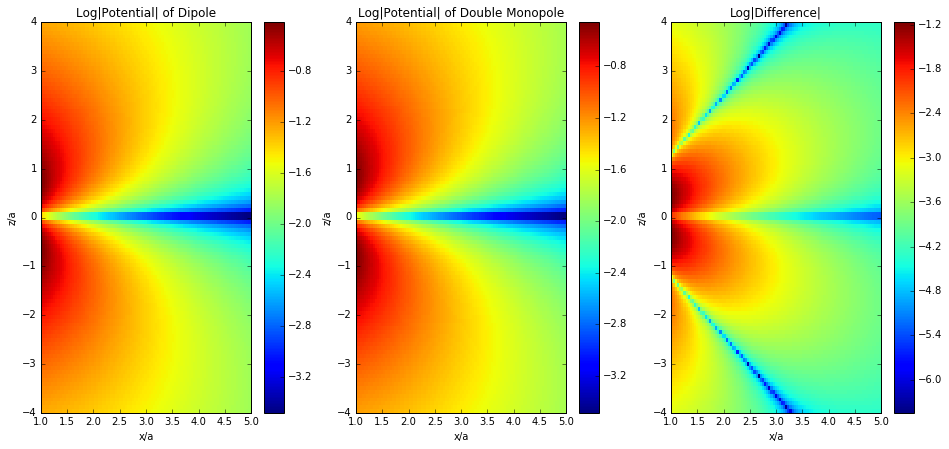

In [38]:
#plot in 2D!
%matplotlib inline
import matplotlib.pyplot as plt

N = 100
x = np.linspace(1,5,N)
z = np.linspace(-4,4,N)

#plot in the plane of the dipole
X, Z = np.meshgrid(x/a,z/a)
dipole = dipole_potential(X/a,0,Z/a)
double_monopole = double_monopole_potential(X/a,0,Z/a)
fractional_diff = fractional_difference(X/a,0,Z/a)

fig3 = plt.figure(figsize = (16,7))
ax1 = fig3.add_subplot(131)
p1 = ax1.pcolor(x/a,z/a,np.log10(np.absolute(dipole)))
plt.colorbar(p1)
ax1.set_title("Log|Potential| of Dipole")
ax1.set_xlabel("x/a")
ax1.set_ylabel("z/a")
ax2 = fig3.add_subplot(132)
p2 = ax2.pcolor(x/a,z/a,np.log10(np.absolute(double_monopole)))
plt.colorbar(p2)
ax2.set_title("Log|Potential| of Double Monopole")
ax2.set_xlabel("x/a")
ax2.set_ylabel("z/a")
ax3 = fig3.add_subplot(133)
p3 = ax3.pcolor(x/a,z/a,np.log10(np.absolute(fractional_diff*double_monopole)))
plt.colorbar(p3)
ax3.set_title("Log|Difference|")
ax3.set_xlabel("x/a")
ax3.set_ylabel("z/a")
plt.show()